In [1]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api  as sm
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv("creditcard.csv")
scaler = MinMaxScaler()
new_df = scaler.fit_transform(df)
print(new_df)
new_df_2=df.drop('Time',axis=1)
print("Dimensions of original Datasets is ", new_df_2.shape)
print(new_df_2.Class.value_counts())
print(new_df_2)
new_df_2



[[0.00000000e+00 9.35192337e-01 7.66490419e-01 ... 3.12696634e-01
  5.82379309e-03 0.00000000e+00]
 [0.00000000e+00 9.78541955e-01 7.70066651e-01 ... 3.13422663e-01
  1.04705276e-04 0.00000000e+00]
 [5.78730497e-06 9.35217023e-01 7.53117667e-01 ... 3.11911316e-01
  1.47389219e-02 0.00000000e+00]
 ...
 [9.99976851e-01 9.90904812e-01 7.64079694e-01 ... 3.12584864e-01
  2.64215395e-03 0.00000000e+00]
 [9.99976851e-01 9.54208999e-01 7.72855742e-01 ... 3.15245157e-01
  3.89238944e-04 0.00000000e+00]
 [1.00000000e+00 9.49231759e-01 7.65256401e-01 ... 3.13400843e-01
  8.44648509e-03 0.00000000e+00]]
Dimensions of original Datasets is  (284807, 30)
0    284315
1       492
Name: Class, dtype: int64
               V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.96

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
X=new_df_2.drop(['Amount'],axis=1)
Y=new_df_2['Class']
#X, Y = make_classification(n_samples=100, random_state=42)

# Importing Datasets-(Splitting Dataset into Training and Testing)

In [4]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, train_size=0.8, random_state=42 ,shuffle=True, stratify=None)
print("Size(rows) of training data is",len(X_train))
print("Size(rows) of testing data is",len(X_test))
print("Data types of training data(X) are ",X_train.dtypes)
print("Data types of training data(X) are ",X_train.describe)
print("                            ")
print("Data types of testing data(X) are ",X_test.dtypes)
print("Data types of testing  data(X) are ",X_train.describe)
print("                            ")
X_train,X_test

Size(rows) of training data is 227845
Size(rows) of testing data is 56962
Data types of training data(X) are  V1       float64
V2       float64
V3       float64
V4       float64
V5       float64
V6       float64
V7       float64
V8       float64
V9       float64
V10      float64
V11      float64
V12      float64
V13      float64
V14      float64
V15      float64
V16      float64
V17      float64
V18      float64
V19      float64
V20      float64
V21      float64
V22      float64
V23      float64
V24      float64
V25      float64
V26      float64
V27      float64
V28      float64
Class      int64
dtype: object
Data types of training data(X) are  <bound method NDFrame.describe of               V1        V2        V3        V4        V5        V6        V7  \
223361  1.955041 -0.380783 -0.315013  0.330155 -0.509374 -0.086197 -0.627978   
165061 -0.400975 -0.626943  1.555339 -2.017772 -0.107769  0.168310  0.017959   
238186  0.072509  0.820566 -0.561351 -0.709897  1.080399 -0.359429  0.787

(              V1        V2        V3        V4        V5        V6        V7  \
 223361  1.955041 -0.380783 -0.315013  0.330155 -0.509374 -0.086197 -0.627978   
 165061 -0.400975 -0.626943  1.555339 -2.017772 -0.107769  0.168310  0.017959   
 238186  0.072509  0.820566 -0.561351 -0.709897  1.080399 -0.359429  0.787858   
 150562 -0.535045  1.014587  1.750679  2.769390  0.500089  1.002270  0.847902   
 138452 -4.026938  1.897371 -0.429786 -0.029571 -0.855751 -0.480406 -0.435632   
 ...          ...       ...       ...       ...       ...       ...       ...   
 119879  1.173488  0.100792  0.490512  0.461596 -0.296377 -0.213165 -0.165254   
 259178 -0.775981  0.144023 -1.142399 -1.241113  1.940358  3.912076 -0.466107   
 131932 -0.146609  0.992946  1.524591  0.485774  0.349308 -0.815198  1.076640   
 146867 -2.948638  2.354849 -2.521201 -3.798905  1.866302  2.727695 -0.471769   
 121958  1.233174 -0.784851  0.386784 -0.698559 -1.034018 -0.637028 -0.502369   
 
               V8        V

#  MLP Classfication

In [5]:
clf = MLPClassifier(random_state=42, max_iter=10,hidden_layer_sizes=(10,2), solver='adam', shuffle=True).fit(X_train, Y_train)
#clf.predict_proba(X_test)
a=clf.predict(X_test)
r=pd.DataFrame({'Predicted Class': a,'Actual Class': Y_test })
print("Accuracy is =", clf.score(X_test, Y_test))
r

Accuracy is = 0.9998771110564938


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


,Predicted Class,Actual Class
43428,1,1
49906,0,0
29474,0,0
276481,0,0
278846,0,0
...,...,...
75723,0,0
252263,0,0
221246,0,0
81910,0,0


In [6]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, train_size=0.8, random_state=42 ,shuffle=True, stratify=None)
clf = MLPClassifier(random_state=42, max_iter=20,hidden_layer_sizes=(28,2), solver='adam', alpha=0.0001,).fit(X_train, Y_train)
#clf.predict_proba(X_test)
a=clf.predict(X_test)
r=pd.DataFrame({'Predicted Class': a,'Actual Class': Y_test })
print("Accuracy is =", clf.score(X_test, Y_test))
r

Accuracy is = 0.9999648888732839


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


,Predicted Class,Actual Class
43428,1,1
49906,0,0
29474,0,0
276481,0,0
278846,0,0
...,...,...
75723,0,0
252263,0,0
221246,0,0
81910,0,0


In [7]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, train_size=0.8, random_state=42 ,shuffle=True, stratify=None)
clf = MLPClassifier(random_state=42, max_iter=50,hidden_layer_sizes=(28,5,2), solver='adam', alpha=0.0001,).fit(X_train, Y_train)
#clf.predict_proba(X_test)
a=clf.predict(X_test)
r=pd.DataFrame({'Predicted Class': a,'Actual Class': Y_test })
print("Accuracy is =", clf.score(X_test, Y_test))
r

Accuracy is = 0.999982444436642


,Predicted Class,Actual Class
43428,1,1
49906,0,0
29474,0,0
276481,0,0
278846,0,0
...,...,...
75723,0,0
252263,0,0
221246,0,0
81910,0,0


In [8]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, train_size=0.8, random_state=42 ,shuffle=True, stratify=None)
clf = MLPClassifier(random_state=42, max_iter=100,hidden_layer_sizes=(50,5), solver='adam', alpha=0.0001,).fit(X_train, Y_train)
#clf.predict_proba(X_test)
a=clf.predict(X_test)
r=pd.DataFrame({'Predicted Class': a,'Actual Class': Y_test })
print("Accuracy is =", clf.score(X_test, Y_test))
r

Accuracy is = 1.0


,Predicted Class,Actual Class
43428,1,1
49906,0,0
29474,0,0
276481,0,0
278846,0,0
...,...,...
75723,0,0
252263,0,0
221246,0,0
81910,0,0


We can see that as we are incresing the size of hidden layer we are getting more accurate values 

# Logistic Regression

In [9]:
model=LogisticRegression(max_iter=50,solver='liblinear')
model.fit(X_train,Y_train)
b=model.predict(X_test)
d=pd.DataFrame({'Original Class': Y_test, 'Predicted Class': b})
c=accuracy_score(b,Y_test)
print("Accuracy score of testing  model = ",c)  # Accuracy is 99.8%  
X_test,Y_test
d

Accuracy score of testing  model =  1.0


,Original Class,Predicted Class
43428,1,1
49906,0,0
29474,0,0
276481,0,0
278846,0,0
...,...,...
75723,0,0
252263,0,0
221246,0,0
81910,0,0


In [10]:
model=LogisticRegression(max_iter=40,solver='liblinear')
model.fit(X_train,Y_train)
b=model.predict(X_test)
pd.DataFrame({'Original Class': Y_test, 'Predicted Class': b})
c=accuracy_score(b,Y_test)
print("Accuracy score of testing  model = ",c)  # Accuracy is 99.8%  

Accuracy score of testing  model =  1.0


In [11]:
model=LogisticRegression(max_iter=20,solver='liblinear')
model.fit(X_train,Y_train)
b=model.predict(X_test)
pd.DataFrame({'Original Class': Y_test, 'Predicted Class': b})
c=accuracy_score(b,Y_test)
print("Accuracy score of testing  model = ",c)  # Accuracy is 99.8%  

Accuracy score of testing  model =  1.0


In [12]:
model=LogisticRegression(max_iter=100,solver='liblinear')
model.fit(X_train,Y_train)
b=model.predict(X_test)
pd.DataFrame({'Original Class': Y_test, 'Predicted Class': b})
c=accuracy_score(b,Y_test)
print("Accuracy score of testing  model = ",c)  # Accuracy is 99.8%  

Accuracy score of testing  model =  1.0


Confusion Matrix is  [[56864     0]
 [    0    98]]
The precision on training data is : 1.0
The recall on training data is : 1.0


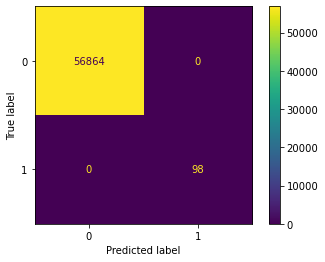

In [13]:
cm_matrix_test = confusion_matrix(Y_test,b)
print("Confusion Matrix is ", cm_matrix_test)
cm_display = ConfusionMatrixDisplay(cm_matrix_test).plot()
precision = precision_score(Y_test,b)
print(f"The precision on training data is : {round(precision, 3)}")
recall = recall_score(Y_test, b)
print(f"The recall on training data is : {round(recall, 2)}")